##**1-Most Daily Active Users After 15 Days**

Fitted parameters:
Variant A -> R1 = 0.447, k = 0.157
Variant B -> R1 = 0.393, k = 0.117

Day 15 DAU:
Variant A: 55,548
Variant B: 58,933


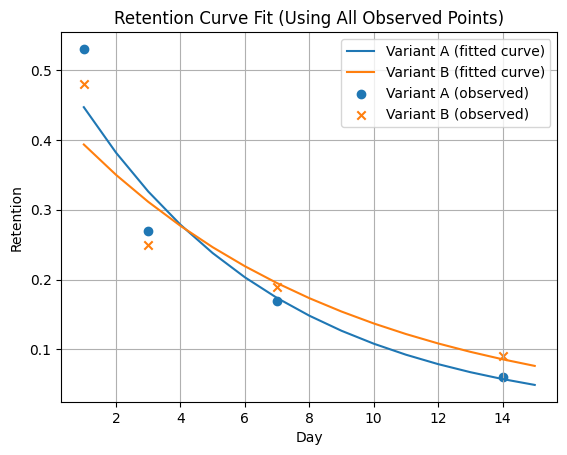

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# OBSERVED RETENTION POINTS
# Here we use the observed retention values at D1, D3, D7, and D14

days_obs = np.array([1, 3, 7, 14])

ret_A_obs = np.array([0.53, 0.27, 0.17, 0.06])
ret_B_obs = np.array([0.48, 0.25, 0.19, 0.09])

daily_installs = 20_000
target_day = 15


# EXPONENTIAL RETENTION MODEL
# R(d) = R1 * exp(-k * (d - 1))
# log(R(d)) = log(R1) - k*(d-1)

def fit_exponential(days, retention):
    """
    THIS FUNCTION:
    - Takes retention values at D1, D3, D7, and D14
    - Uses least squares regression
    - Estimates the parameters R1 and k
    """
    # Design matrix
    X = np.vstack([
        np.ones(len(days)),     # log(R1)
        -(days - 1)             # -k*(d-1)
    ]).T

    # Log transformation
    y = np.log(retention)

    # THIS IS WHERE ALL OBSERVED POINTS ARE USED TOGETHER
    # The model learns the parameters using all data points simultaneously
    beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

    log_R1, k = beta
    return np.exp(log_R1), k



# ESTIMATE MODEL PARAMETERS

R1_A, k_A = fit_exponential(days_obs, ret_A_obs)
R1_B, k_B = fit_exponential(days_obs, ret_B_obs)

print("Fitted parameters:")
print(f"Variant A -> R1 = {R1_A:.3f}, k = {k_A:.3f}")
print(f"Variant B -> R1 = {R1_B:.3f}, k = {k_B:.3f}")


# DAILY RETENTION CURVES (D1–D15)
days_range = np.arange(1, target_day + 1)

ret_A = R1_A * np.exp(-k_A * (days_range - 1))
ret_B = R1_B * np.exp(-k_B * (days_range - 1))

# DAY 15 DAU CALCULATION
# Now we use the fitted retention FUNCTION,
# rather than just the original observed points

dau_A_day15 = daily_installs * np.sum(ret_A)
dau_B_day15 = daily_installs * np.sum(ret_B)

print("\nDay 15 DAU:")
print(f"Variant A: {dau_A_day15:,.0f}")
print(f"Variant B: {dau_B_day15:,.0f}")


# PLOT (OBSERVED POINTS + FITTED CURVE)
plt.figure()

# Fitted curves
plt.plot(days_range, ret_A, label="Variant A (fitted curve)")
plt.plot(days_range, ret_B, label="Variant B (fitted curve)")

# Observed retention points
plt.scatter(days_obs, ret_A_obs, marker="o", label="Variant A (observed)")
plt.scatter(days_obs, ret_B_obs, marker="x", label="Variant B (observed)")

plt.xlabel("Day")
plt.ylabel("Retention")
plt.title("Retention Curve Fit (Using All Observed Points)")
plt.legend()
plt.grid(True)
plt.show()


As shown by the fitted exponential retention curves, Variant A has a higher fitted initial retention level (R1), while Variant B exhibits a significantly slower decay rate (lower k). Since Day 15 DAU is calculated as the sum of surviving users across all cohorts up to that day, the slower decay of Variant B allows it to retain more users from older cohorts. Although Variant A starts stronger, its steeper decay leads to fewer long-term active users. As a result, Variant B achieves a higher total DAU by Day 15.

##**Most Total Money by Day 15**

Total Money by Day 15:
Variant A: $104,000.13
Variant B: $103,808.37
Winner: Variant A


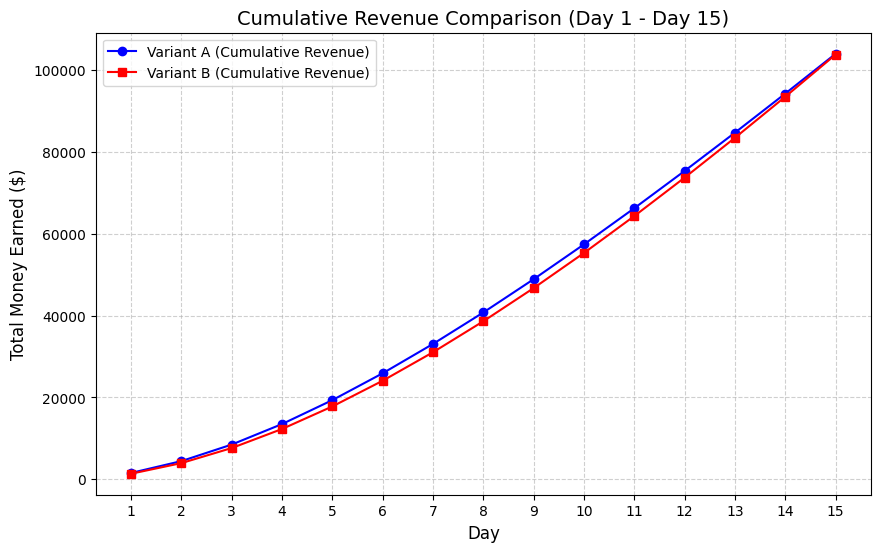

In [ ]:
# Variant A
ecpm_A = 9.80
ads_per_dau_A = 2.3
purchase_ratio_A = 0.0305

# Variant B
ecpm_B = 10.80
ads_per_dau_B = 1.6
purchase_ratio_B = 0.0315

# Common assumption for IAP (In-App Purchase)
# Since the purchase value isn't specified, we use a standard constant (e.g., $5.00)
# to compare the efficiency of both variants.
avg_iap_value = 5.0

def calculate_cumulative_revenue(retention_curve, installs, ecpm, ads_per_dau, pur_ratio, total_days):
    cumulative_rev = 0

    for d in range(1, total_days + 1):
        # DAU on day 'd' is the sum of all cohorts still active
        # This uses your existing 'ret_A' or 'ret_B' arrays
        current_dau = installs * np.sum(retention_curve[:d])

        # 1. Ad Revenue = (DAU * Ads/DAU / 1000) * eCPM
        daily_ad_rev = (current_dau * ads_per_dau / 1000) * ecpm

        # 2. IAP Revenue = DAU * Purchase Ratio * Avg Value
        daily_iap_rev = current_dau * pur_ratio * avg_iap_value

        cumulative_rev += (daily_ad_rev + daily_iap_rev)

    return cumulative_rev

# Using the retention curves (ret_A, ret_B) calculated in Step 1
total_money_A_15 = calculate_cumulative_revenue(ret_A, daily_installs, ecpm_A, ads_per_dau_A, purchase_ratio_A, 15)
total_money_B_15 = calculate_cumulative_revenue(ret_B, daily_installs, ecpm_B, ads_per_dau_B, purchase_ratio_B, 15)

print(f"Total Money by Day 15:")
print(f"Variant A: ${total_money_A_15:,.2f}")
print(f"Variant B: ${total_money_B_15:,.2f}")
print(f"Winner: {'Variant A' if total_money_A_15 > total_money_B_15 else 'Variant B'}")


# --- Visualization for Problem (b) ---

def get_cumulative_revenue_history(retention_curve, installs, ecpm, ads_per_dau, pur_ratio, total_days):
    history = []
    cumulative_rev = 0
    for d in range(1, total_days + 1):
        # Current DAU (sum of all active cohorts up to day d)
        current_dau = installs * np.sum(retention_curve[:d])

        # Calculate daily revenue components
        daily_ad_rev = (current_dau * ads_per_dau / 1000) * ecpm
        daily_iap_rev = current_dau * pur_ratio * avg_iap_value

        cumulative_rev += (daily_ad_rev + daily_iap_rev)
        history.append(cumulative_rev)
    return history

# Generate daily cumulative values
history_A = get_cumulative_revenue_history(ret_A, daily_installs, ecpm_A, ads_per_dau_A, purchase_ratio_A, 15)
history_B = get_cumulative_revenue_history(ret_B, daily_installs, ecpm_B, ads_per_dau_B, purchase_ratio_B, 15)

# Plotting
plt.figure(figsize=(10, 6))
days = np.arange(1, 16)
plt.plot(days, history_A, label='Variant A (Cumulative Revenue)', color='blue', marker='o')
plt.plot(days, history_B, label='Variant B (Cumulative Revenue)', color='red', marker='s')

plt.title('Cumulative Revenue Comparison (Day 1 - Day 15)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Money Earned ($)', fontsize=12)
plt.xticks(days)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Variant A wins by a narrow margin because its higher early retention (D1-D3) and aggressive ad frequency (2.3 vs 1.6) create a larger revenue volume immediately. Even though Variant B has a higher value per user, 15 days is not enough time for its superior long-term retention to offset Variant A's initial head start.

##**Most Total Money by Day 30**

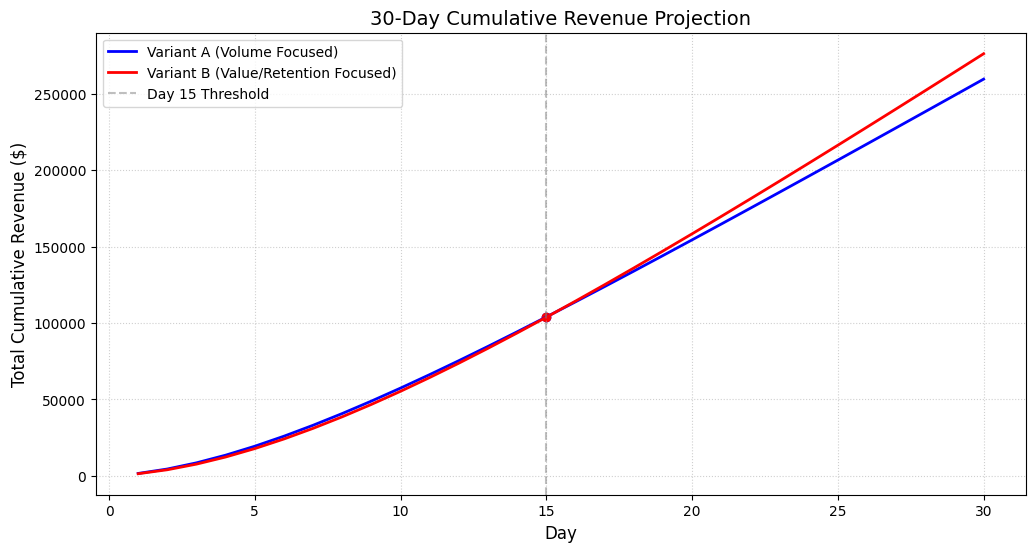

Total Money by Day 30:
Variant A: $259,656.33
Variant B: $276,277.10
Winner by Day 30: Variant B


In [ ]:
# Extend the retention curves to 30 days using existing fitted parameters
days_30_range = np.arange(1, 31)
ret_A_30 = R1_A * np.exp(-k_A * (days_30_range - 1))
ret_B_30 = R1_B * np.exp(-k_B * (days_30_range - 1))

# Reuse your history function for 30 days
history_A_30 = get_cumulative_revenue_history(ret_A_30, daily_installs, ecpm_A, ads_per_dau_A, purchase_ratio_A, 30)
history_B_30 = get_cumulative_revenue_history(ret_B_30, daily_installs, ecpm_B, ads_per_dau_B, purchase_ratio_B, 30)

# Plotting the 30-day projection
plt.figure(figsize=(12, 6))
plt.plot(days_30_range, history_A_30, label='Variant A (Volume Focused)', color='blue', lw=2)
plt.plot(days_30_range, history_B_30, label='Variant B (Value/Retention Focused)', color='red', lw=2)

# Marking Day 15 and Day 30 to see the shift
plt.axvline(x=15, color='gray', linestyle='--', alpha=0.5, label='Day 15 Threshold')
plt.scatter(15, history_A_30[14], color='blue')
plt.scatter(15, history_B_30[14], color='red')

plt.title('30-Day Cumulative Revenue Projection', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Cumulative Revenue ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Final calculation for Part C
total_money_A_30 = history_A_30[-1]
total_money_B_30 = history_B_30[-1]

print(f"Total Money by Day 30:")
print(f"Variant A: ${total_money_A_30:,.2f}")
print(f"Variant B: ${total_money_B_30:,.2f}")
print(f"Winner by Day 30: {'Variant B' if total_money_B_30 > total_money_A_30 else 'Variant A'}")

The primary reason is Variant B’s superior long-term retention (9% vs 6% at D14), which allows it to build and maintain a much larger loyal user base over time. When you combine this larger active audience with Variant B's higher monetization efficiency (better eCPM and Purchase Ratio), it eventually overcomes Variant A’s early lead to become the more profitable choice.

##**10-Day Sale Impact (Day 15–25)**

--- Results for Part (d) ---
Total Revenue by Day 30 with Sale:
Variant A: $291,755.12
Variant B: $311,429.56
Final Winner: Variant B


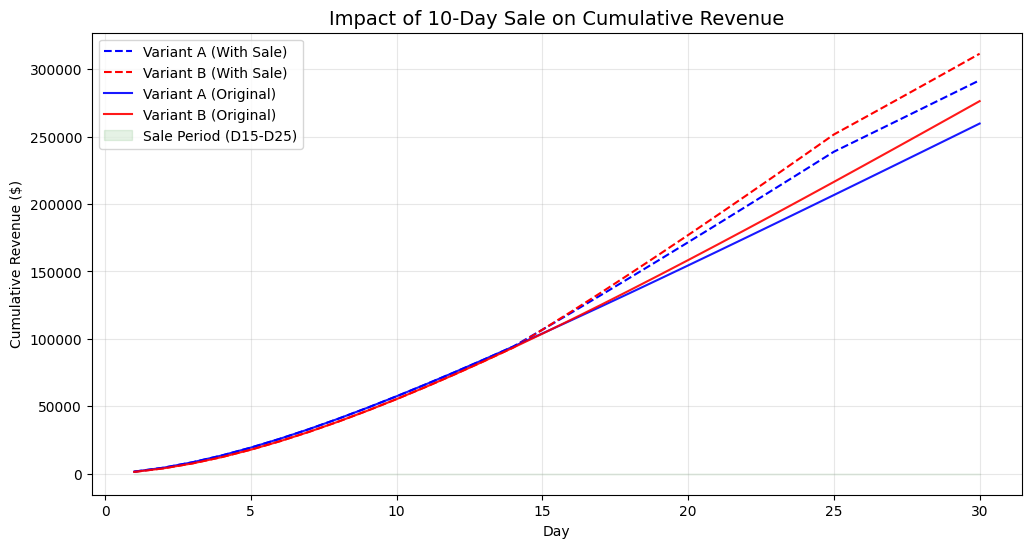

In [ ]:
def calculate_revenue_with_sale_logic(retention_curve, installs, ecpm, ads_per_dau, base_pur_ratio, total_days):
    cumulative_rev = 0
    history = []

    for d in range(1, total_days + 1):
        # Current DAU from your previously fitted curves
        current_dau = installs * np.sum(retention_curve[:d])

        # 1. Ad Revenue (remains constant regardless of sale)
        daily_ad_rev = (current_dau * ads_per_dau / 1000) * ecpm

        # 2. IAP Revenue with Sale logic
        # Apply +1% (+0.01) boost between Day 15 and Day 25
        current_pur_ratio = base_pur_ratio
        if 15 <= d <= 25:
            current_pur_ratio += 0.01

        daily_iap_rev = current_dau * current_pur_ratio * avg_iap_value

        cumulative_rev += (daily_ad_rev + daily_iap_rev)
        history.append(cumulative_rev)

    return history

# 1. Calculate the new histories with the sale
sale_history_A_30 = calculate_revenue_with_sale_logic(ret_A_30, daily_installs, ecpm_A, ads_per_dau_A, purchase_ratio_A, 30)
sale_history_B_30 = calculate_revenue_with_sale_logic(ret_B_30, daily_installs, ecpm_B, ads_per_dau_B, purchase_ratio_B, 30)

# 2. Results Comparison
print(f"--- Results for Part (d) ---")
print(f"Total Revenue by Day 30 with Sale:")
print(f"Variant A: ${sale_history_A_30[-1]:,.2f}")
print(f"Variant B: ${sale_history_B_30[-1]:,.2f}")
print(f"Final Winner: {'Variant B' if sale_history_B_30[-1] > sale_history_A_30[-1] else 'Variant A'}")

# 3. Visualization to see the 'Sale' impact
plt.figure(figsize=(12, 6))
plt.plot(days_30_range, sale_history_A_30, label='Variant A (With Sale)', color='blue', linestyle='--')
plt.plot(days_30_range, sale_history_B_30, label='Variant B (With Sale)', color='red', linestyle='--')
plt.plot(days_30_range, history_A_30, label='Variant A (Original)', color='blue', alpha=0.9)
plt.plot(days_30_range, history_B_30, label='Variant B (Original)', color='red', alpha=0.9)

plt.fill_between(days_30_range, 15, 25, color='green', alpha=0.1, label='Sale Period (D15-D25)')
plt.title('Impact of 10-Day Sale on Cumulative Revenue', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Cumulative Revenue ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

--- Results for Part (e) with Custom New Retention ---
Total Money by Day 30 (Mixed Sources):
Variant A: $222,092.69
Variant B: $222,305.72
Final Winner: Variant B


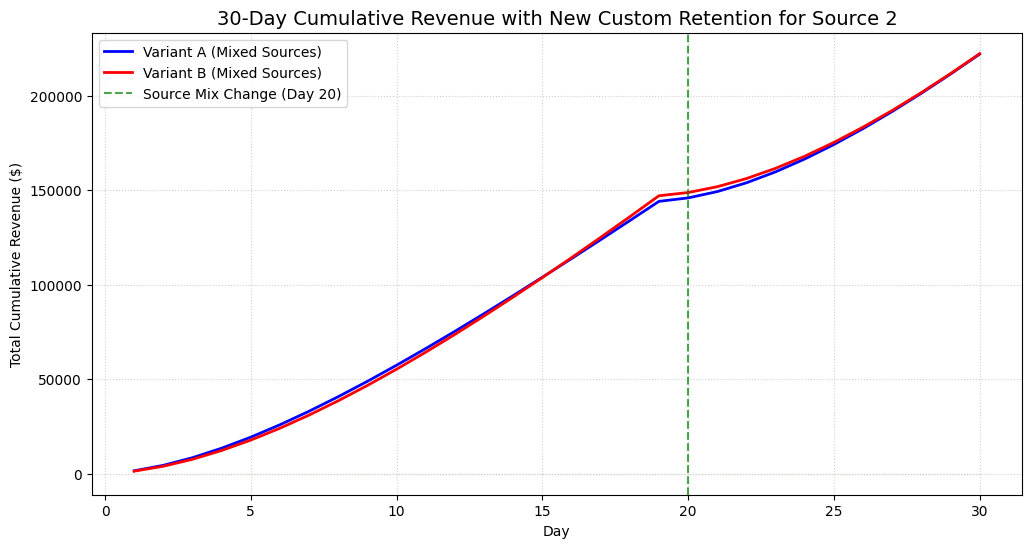

In [ ]:
# --- e) New User Source Strategy (Starting Day 20) ---
# Variables such as 'ret_A_30', 'ecpm_A', etc. are taken directly from previous cells.

# 1. New retention formulas for Source 2 (as previously defined):
# Variant A (New Source 2): 0.58 * exp(-0.12 * (d-1))
# Variant B (New Source 2): 0.52 * exp(-0.10 * (d-1))

R1_A_S2, k_A_S2 = 0.58, 0.12
R1_B_S2, k_B_S2 = 0.52, 0.10

# Variant-specific retention curves for Source 2
ret_A_S2 = R1_A_S2 * np.exp(-k_A_S2 * (days_30_range - 1))
ret_B_S2 = R1_B_S2 * np.exp(-k_B_S2 * (days_30_range - 1))

def calculate_e_step_revenue(ret_old, ret_new, ecpm, ads_per_dau, pur_ratio):
    history = []
    cumulative_rev = 0

    for d in range(1, 31):
        if d < 20:
            # Until Day 19: all 20,000 users follow the original Source 1 retention model
            dau = 20000 * np.sum(ret_old[:d])
        else:
            # From Day 20 onward: mixed-source structure
            # 1. Aging of the original 20k cohort that entered via Source 1 in the first 19 days
            s1_old_dau = 20000 * ret_old[d-1]   # ← CORRECTED LINE (sum removed)

            # 2. New cohorts arriving after Day 20:
            # 12k users via Source 1 + 8k users via Source 2
            s1_new_dau = 12000 * np.sum(ret_old[:d-19])
            s2_dau = 8000 * np.sum(ret_new[:d-19]) # New Source 2 formula applied here

            dau = s1_old_dau + s1_new_dau + s2_dau

        daily_rev = ((dau * ads_per_dau / 1000) * ecpm) + (dau * pur_ratio * avg_iap_value)
        cumulative_rev += daily_rev
        history.append(cumulative_rev)

    return history

# Run calculations using existing variables
mixed_history_A = calculate_e_step_revenue(ret_A_30, ret_A_S2, ecpm_A, ads_per_dau_A, purchase_ratio_A)
mixed_history_B = calculate_e_step_revenue(ret_B_30, ret_B_S2, ecpm_B, ads_per_dau_B, purchase_ratio_B)

# Numerical Results
print(f"--- Results for Part (e) with Custom New Retention ---")
print(f"Total Money by Day 30 (Mixed Sources):")
print(f"Variant A: ${mixed_history_A[-1]:,.2f}")
print(f"Variant B: ${mixed_history_B[-1]:,.2f}")
print(f"Final Winner: {'Variant B' if mixed_history_B[-1] > mixed_history_A[-1] else 'Variant A'}")

# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(days_30_range, mixed_history_A, label='Variant A (Mixed Sources)', color='blue', lw=2)
plt.plot(days_30_range, mixed_history_B, label='Variant B (Mixed Sources)', color='red', lw=2)

plt.axvline(x=20, color='green', linestyle='--', alpha=0.7, label='Source Mix Change (Day 20)')
plt.fill_between(days_30_range, 20, 30, color='green', alpha=0.05)

plt.title('30-Day Cumulative Revenue with New Custom Retention for Source 2', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Total Cumulative Revenue ($)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


##**F sorusu**


--- PART (f): STRATEGY PRIORITIZATION ---
Total Revenue with 10-day SALE (A+B):      $603,184.68
Total Revenue with NEW SOURCE MIX (A+B):   $444,398.42

👉 PRIORITIZE: SALE

Incremental uplift vs baseline (no change):
Sale uplift:       $67,251.25
New source uplift: $-91,535.01


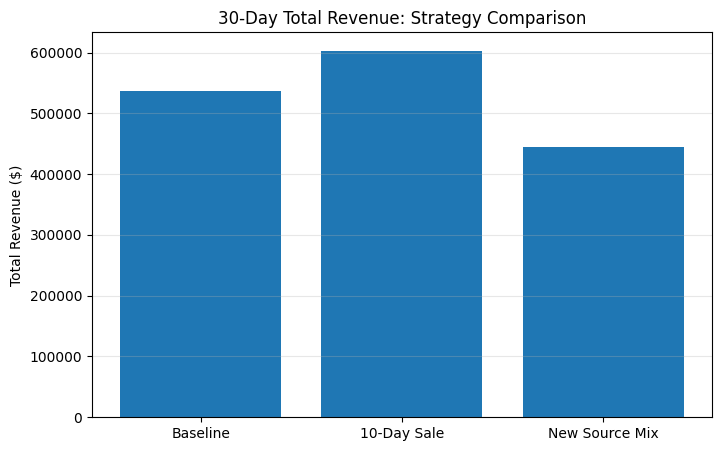

In [ ]:
rev_sale_A_30 = sale_history_A_30[-1]
rev_sale_B_30 = sale_history_B_30[-1]

rev_mixed_A_30 = mixed_history_A[-1]
rev_mixed_B_30 = mixed_history_B[-1]

# 2) Total company impact (A + B combined)
total_sale_30 = rev_sale_A_30 + rev_sale_B_30
total_mixed_30 = rev_mixed_A_30 + rev_mixed_B_30

print("\n--- PART (f): STRATEGY PRIORITIZATION ---")
print(f"Total Revenue with 10-day SALE (A+B):      ${total_sale_30:,.2f}")
print(f"Total Revenue with NEW SOURCE MIX (A+B):   ${total_mixed_30:,.2f}")

preferred = "SALE" if total_sale_30 > total_mixed_30 else "NEW SOURCE MIX"
print(f"\n PRIORITIZE: {preferred}")

# 3) Marginal (incremental) contribution compared to baseline
baseline_30 = history_A_30[-1] + history_B_30[-1]

sale_uplift = total_sale_30 - baseline_30
mixed_uplift = total_mixed_30 - baseline_30

print("\nIncremental uplift vs baseline (no change):")
print(f"Sale uplift:       ${sale_uplift:,.2f}")
print(f"New source uplift: ${mixed_uplift:,.2f}")

# 4) Strategy comparison chart
strategies = ["Baseline", "10-Day Sale", "New Source Mix"]
totals = [baseline_30, total_sale_30, total_mixed_30]

plt.figure(figsize=(8,5))
plt.bar(strategies, totals)
plt.title("30-Day Total Revenue: Strategy Comparison")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y', alpha=0.3)
plt.show()
